# Analyze Time Complexity

In this Jupyter Notebok, we will be analyzing the time complexity of the Hybrid Sort Algorithm.

We carried out 3 Empirical Analysis to see whether our findings are consistent with our Theoretical Analysis:
1. `Number of key comparisons VS Input sizes`
    <br>
    We fixed the value of S at 10, and plot the number of key comparisons over different sizes of the input list n ranging from 1000 to 10_000_000 on a logarithmic scale. Each data point is the average result of 10 random tests.
    <br><br>
2. `Number of key comparisons VS S values`
    <br>
    We fixed the input size n at 1000, and plot the number of key comparisons over different values of S ranging from 2 to 1000. Each data point is the average result of 10 random tests. We also decided to further narrow the range of S as we were carrying out the test for more informative and conslusive trend.
    <br><br>
3. `Determine the optimal S value`
    <br>
    We realized that S is simply the threshold array size in which the Insertion Sort performs better than the Mergesort. So we plot the graph of Average Key Comparisons VS Array Sizes (S) for both Insertion Sort and Mergersort, and find the intersection point.

# Import Required Libraries

In [4]:
from hybrid_sort_key_cmp import HybridSortKeyCmp

import matplotlib.pyplot as plt

# Declare constants

In [5]:
S_FIXED = 10
MIN_INPUT_SIZE = 1000
MAX_INPUT_SIZE = 10_000_000

INPUT_SIZE_FIXED = 1000
MIN_S = 2
MAX_S = 1000

RANDOM_TESTS = 10

# 1. Number of key comparisons VS Input sizes

### 1.1 Plot Average Key Comparisons vs. Input Sizes

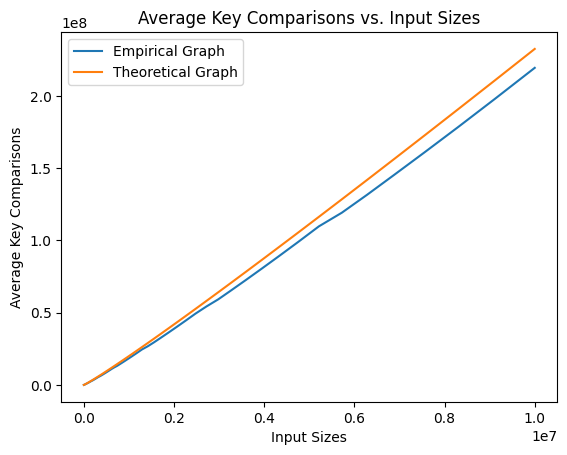

In [6]:
input_sizes, average_key_cmps = HybridSortKeyCmp.average_key_cmps_with_s_fixed(MIN_INPUT_SIZE, MAX_INPUT_SIZE, S_FIXED, RANDOM_TESTS)
theoretical_average_key_cmps = HybridSortKeyCmp.theoretical_nlogn_graph(input_sizes)

plt.plot(input_sizes, average_key_cmps, label='Empirical Graph', linestyle='-')
plt.plot(input_sizes, theoretical_average_key_cmps, label='Theoretical Graph', linestyle='-')

plt.xlabel('Input Sizes')
plt.ylabel('Average Key Comparisons')
plt.title('Average Key Comparisons vs. Input Sizes')

plt.legend()

plt.show()

### 1.2 Compare Empirical Results with Theoretical Analysis
<br>
<br>

# 2 Number of key comparisons VS S values

### 2.1 Plot Average Key Comparisons vs. S Values (2-1000)

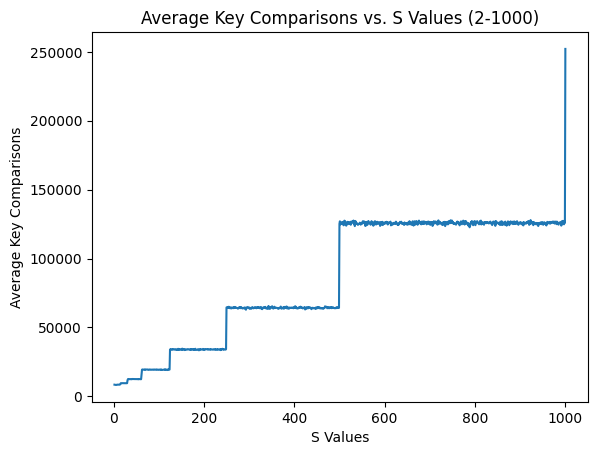

In [7]:
s_values, average_key_cmps = HybridSortKeyCmp.average_key_cmps_with_n_fixed(MIN_S, MAX_S, INPUT_SIZE_FIXED, RANDOM_TESTS)

plt.plot(s_values, average_key_cmps, linestyle='-')

plt.xlabel('S Values')
plt.ylabel('Average Key Comparisons')
plt.title('Average Key Comparisons vs. S Values (2-1000)')

plt.show()

### General Upward Trend

As seen from the graph, there is a general upward trend, such that the higher the value of S, the greater the average key comparisons.

However, we are interested in finding the optimal S value for the best performance of the hybrid sort algorithm, and this trend is not very informative because the range is too big. 

We need to further narrow the range of the S values in order to omit the S values with higher numbers of average key comparisons (bad performance) since they won't be useful in finding the optimal S value.

On further observation, we can see that the least number of key comparisons revolve around the 2-100 range, so we can reduce MAX_S to 100 to zoom into the portion where the S values perform better.

### 2.2 Plot Average Key Comparisons vs. S Values (2-100)

In [8]:
MAX_S_NEW = 100

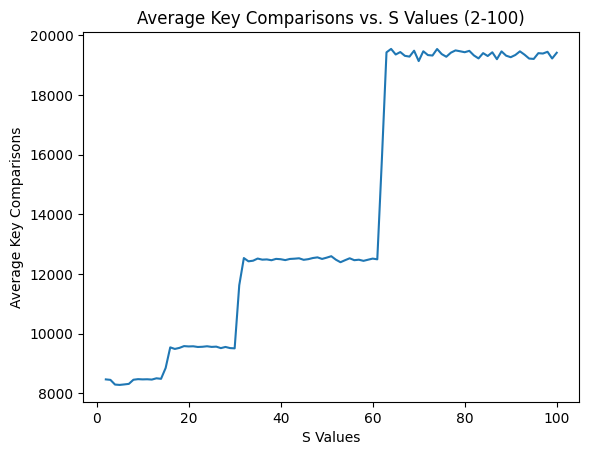

In [9]:
s_values, average_key_cmps = HybridSortKeyCmp.average_key_cmps_with_n_fixed(MIN_S, MAX_S_NEW, INPUT_SIZE_FIXED, RANDOM_TESTS)

plt.plot(s_values, average_key_cmps, linestyle='-')

plt.xlabel('S Values')
plt.ylabel('Average Key Comparisons')
plt.title(f'Average Key Comparisons vs. S Values (2-100)')

plt.show()

### Similar Upward Trend

Again, we are seeing a similar upward trend as when the range was 2-1000, which means we can further narrow the range to filter out the S values with poor performance.

Fortunately, from the graph, we can see that between the range 2-20, the number of average key comparisons seems to be the lowest, which means the S values within this range perform the best. Therefore, we are going to set the MAX_S to be 20 and narrow the range further for a more informative and conclusive graph.

### 2.3 Plot Average Key Comparisons vs. S Values (2-20)

In [10]:
MAX_S_FINAL = 20

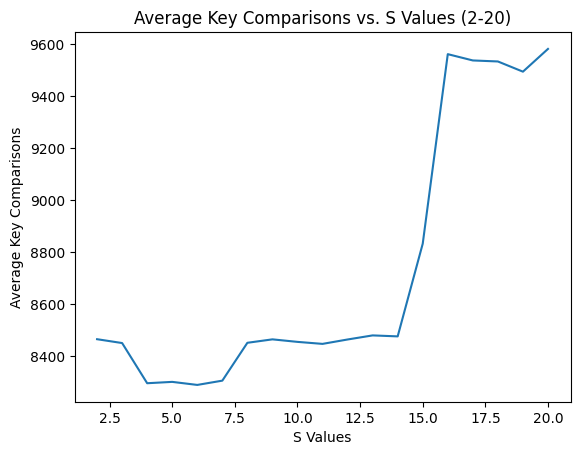

In [11]:
s_values, average_key_cmps = HybridSortKeyCmp.average_key_cmps_with_n_fixed(MIN_S, MAX_S_FINAL, INPUT_SIZE_FIXED, RANDOM_TESTS)

plt.plot(s_values, average_key_cmps, linestyle='-')

plt.xlabel('S Values')
plt.ylabel('Average Key Comparisons')
plt.title(f'Average Key Comparisons vs. S Values (2-20)')

plt.show()

### 2.4 Compare Empirical Results with Theoretical Analysis
<br>
<br>

# 3 Determine the optimal S value

### 3.1 Plot Average Key Comparisons vs. Array Sizes

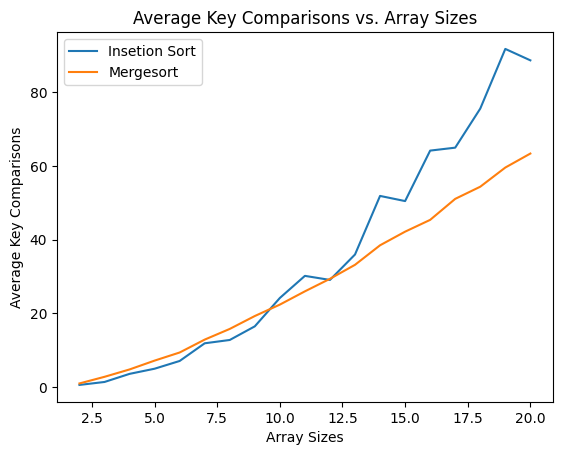

In [12]:
insertion_sort_array_sizes, mergesort_average_key_cmps, insertion_sort_average_key_cmps = HybridSortKeyCmp.average_key_cmps_for_optimal_s(MIN_S, MAX_S_FINAL, RANDOM_TESTS)
mergesort_array_sizes = insertion_sort_array_sizes

plt.plot(insertion_sort_array_sizes, insertion_sort_average_key_cmps, label='Insetion Sort', linestyle='-')
plt.plot(mergesort_array_sizes, mergesort_average_key_cmps, label='Mergesort', linestyle='-')

plt.xlabel('Array Sizes')
plt.ylabel('Average Key Comparisons')
plt.title('Average Key Comparisons vs. Array Sizes')

plt.legend()

plt.show()